In [1]:
# import necessary libraries and modules
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import os
import cv2
import imghdr
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, SparseCategoricalAccuracy
from tensorflow.keras.models import load_model

In [2]:
tf.keras.backend.clear_session()

In [3]:
# define the data directory path
data_dir = './input/formula-one-cars-images'

In [14]:
# build image dataset pipeline
data = tf.keras.utils.image_dataset_from_directory('/content/input/formula-one-cars-images/train/')

Found 6522 files belonging to 10 classes.


In [15]:
# convert dataset to numpy iterator for easy access of data as a pipeline
data_iterator = data.as_numpy_iterator()

In [16]:
# accessing data through extractaction of a single batch from the dataset
batch = data_iterator.next()

In [17]:
# get the class names from the dataset
class_names = data.class_names

In [18]:
# create a mapping from label index to class names
label_to_class = {i: class_name for i, class_name in enumerate(class_names)}
label_to_class

{0: 'alfa_romeo',
 1: 'bwt',
 2: 'ferrari',
 3: 'haas',
 4: 'mclaren',
 5: 'mercedes',
 6: 'redbull',
 7: 'renault',
 8: 'toro_rosso',
 9: 'williams'}

In [19]:
# convert batch labels to class names
batch_class_names = [label_to_class[label] for label in label_to_class]
batch_class_names

['alfa_romeo',
 'bwt',
 'ferrari',
 'haas',
 'mclaren',
 'mercedes',
 'redbull',
 'renault',
 'toro_rosso',
 'williams']

In [20]:
# scale the image data to range [0, 1]
scaled_data = data.map(lambda x,y: (x/255, y))

In [21]:
# partition train
train_size = int(len(scaled_data)*0.7)

In [22]:
# partition test
test_size = int(len(scaled_data)*0.1)+1

In [23]:
# partition validation
val_size = int(len(scaled_data)*0.2)+1

In [24]:
# split data
train = scaled_data.take(train_size)
val = scaled_data.skip(train_size).take(val_size)
test = scaled_data.skip(train_size+val_size).take(test_size)

In [33]:
# initialize Sequential model
model = Sequential()

In [34]:
# add convolutional and pooling layers
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())


# add dense layers for classification
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [35]:
# compile model
model.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [36]:
# get summary of model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

In [37]:
# set the log directory to view history
logdir ='/content/logs'

In [38]:
# set history
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [40]:
# show start time
import datetime
now = datetime.datetime.now()
print(now)

2024-03-22 11:48:00.461009


In [41]:
# train model
model_training = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
142/142 [==============================] - 382s 3s/step - loss: 1.0749 - accuracy: 0.6334 - val_loss: 0.2450 - val_accuracy: 0.9337
Epoch 2/20
142/142 [==============================] - 370s 3s/step - loss: 0.1091 - accuracy: 0.9707 - val_loss: 0.1136 - val_accuracy: 0.9718
Epoch 3/20
142/142 [==============================] - 374s 3s/step - loss: 0.0413 - accuracy: 0.9883 - val_loss: 0.0803 - val_accuracy: 0.9825
Epoch 4/20
142/142 [==============================] - 378s 3s/step - loss: 0.0128 - accuracy: 0.9960 - val_loss: 0.0636 - val_accuracy: 0.9878
Epoch 5/20
142/142 [==============================] - 370s 3s/step - loss: 0.0026 - accuracy: 0.9996 - val_loss: 0.0695 - val_accuracy: 0.9870
Epoch 6/20
142/142 [==============================] - 379s 3s/step - loss: 4.1084e-04 - accuracy: 1.0000 - val_loss: 0.0777 - val_accuracy: 0.9893
Epoch 7/20
142/142 [==============================] - 381s 3s/step - loss: 1.1099e-04 - accuracy: 1.0000 - val_loss: 0.0762 - val_accuracy

In [42]:
# show end time
now = datetime.datetime.now()
print(now)

2024-03-22 13:53:58.992526


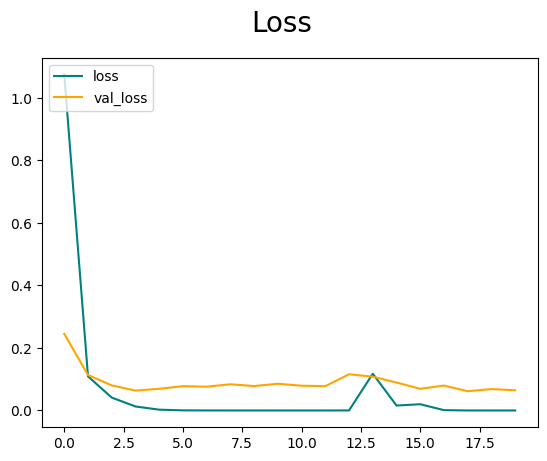

In [43]:
# visualise loss
fig = plt.figure()
plt.plot(model_training.history['loss'], color='teal', label='loss')
plt.plot(model_training.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

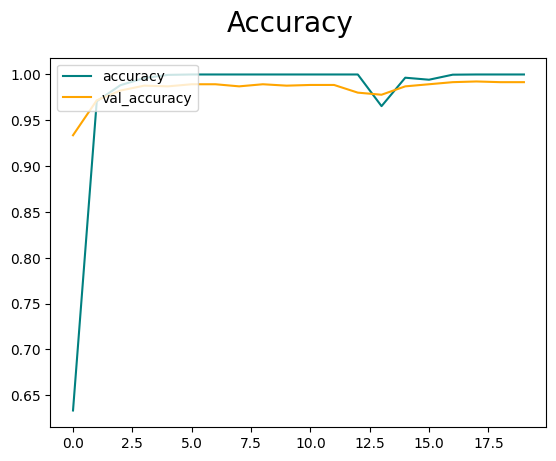

In [44]:
# visualise accuracy
fig = plt.figure()
plt.plot(model_training.history['accuracy'], color='teal', label='accuracy')
plt.plot(model_training.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [45]:
# set accuracy
accuracy = SparseCategoricalAccuracy()

In [46]:
# get accuracy of model
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    accuracy.update_state(y, yhat)

1/1 [==============================] - 0s 455ms/step


In [47]:
print('Accuracy:', accuracy.result().numpy())

Accuracy: 0.990991


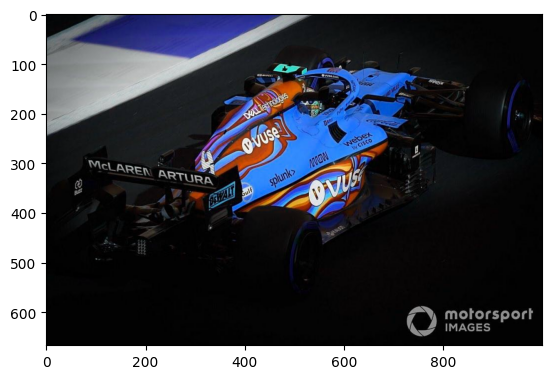

In [49]:
# test model on unforseen image - McLaren F1 Racecar
img = cv2.imread('/content/input/lando-norris-mclaren-mcl35m-1.jpg')
plt.imshow(img)
plt.show()

In [50]:
# convert rgb
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

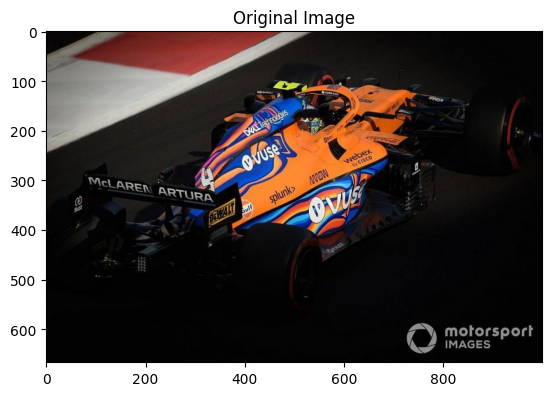

In [51]:
# plot fixed rgb image
plt.imshow(img_rgb)
plt.title("Original Image")
plt.show()

In [52]:
# normalise for model
input_shape = (256, 256)
resized_img = cv2.resize(img_rgb, input_shape)
resized_img_normalized = resized_img / 255.0
input_data = np.expand_dims(resized_img_normalized, axis=0)

In [53]:
# predict
yhat = model.predict(input_data)
yhat

1/1 [==============================] - 0s 47ms/step


array([[3.4816162e-07, 7.3233829e-04, 4.1363090e-01, 4.0553713e-30,
        5.8549893e-01, 3.2336773e-17, 6.3514439e-13, 6.5962645e-31,
        2.6558013e-26, 1.3747426e-04]], dtype=float32)

In [54]:
# map out the racecars
sorted_indices = np.argsort(yhat[0])[::-1]

In [55]:
# print predictions
for i, index in enumerate(sorted_indices):
    prob = yhat[0][index]
    class_name = label_to_class[index]
    print(f'{i+1}th Prediction: {class_name} with {prob*100:.2f}% confidence.')

1th Prediction: mclaren with 58.55% confidence.
2th Prediction: ferrari with 41.36% confidence.
3th Prediction: bwt with 0.07% confidence.
4th Prediction: williams with 0.01% confidence.
5th Prediction: alfa_romeo with 0.00% confidence.
6th Prediction: redbull with 0.00% confidence.
7th Prediction: mercedes with 0.00% confidence.
8th Prediction: toro_rosso with 0.00% confidence.
9th Prediction: haas with 0.00% confidence.
10th Prediction: renault with 0.00% confidence.


In [56]:
# save model
model.save(os.path.join('/content/models','f1-racecar-image-classifier.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [58]:
!git clone https://github.com/azawalich/formula-one-image-classification-model.git

Cloning into 'formula-one-image-classification-model'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (9/9), 425.14 KiB | 5.59 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [60]:
!mv logs /content/formula-one-image-classification-model/

In [61]:
!mv models /content/formula-one-image-classification-model/

In [62]:
!mkdir -p /content/formula-one-image-classification-model/input/formula-one-cars-images/

In [65]:
!touch /content/formula-one-image-classification-model/input/formula-one-cars-images/.gitkeep

In [66]:
!mkdir -p /content/formula-one-image-classification-model/input/formula-one-cars-images/train/

In [72]:
!git config --global user.email "aleksander@zawalich.pl"; git config --global user.name "Aleksander Zawalich"

In [73]:
!cd formula-one-image-classification-model; git status; git add . ; git commit -m "add files";

On branch main
Your branch is up to date with 'origin/main'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	new file:   input/formula-one-cars-images/.gitkeep
	new file:   logs/train/events.out.tfevents.1711107802.c3b8c7a3edc7.362.0.v2
	new file:   logs/train/events.out.tfevents.1711108081.c3b8c7a3edc7.362.1.v2
	new file:   logs/validation/events.out.tfevents.1711108380.c3b8c7a3edc7.362.2.v2
	new file:   models/f1-racecar-image-classifier.h5

[main 9069d5f] add files
 5 files changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 input/formula-one-cars-images/.gitkeep
 create mode 100644 logs/train/events.out.tfevents.1711107802.c3b8c7a3edc7.362.0.v2
 create mode 100644 logs/train/events.out.tfevents.1711108081.c3b8c7a3edc7.362.1.v2
 create mode 100644 logs/validation/events.out.tfevents.1711108380.c3b8c7a3edc7.362.2.v2
 create mode 100644 models/f1-racecar-image-classifier.h5


In [74]:
!cd formula-one-image-classification-model; git push origin main;

fatal: could not read Username for 'https://github.com': No such device or address


In [83]:
! cd /content/; tar -czf /content/input.tar.gz /content/formula-one-image-classification-model/input

tar: Removing leading `/' from member names


In [78]:
! ls -lah /content

total 1.7G
drwxr-xr-x 1 root root 4.0K Mar 22 14:16 .
drwxr-xr-x 1 root root 4.0K Mar 22 10:58 ..
drwxr-xr-x 4 root root 4.0K Mar 20 14:00 .config
drwxr-xr-x 6 root root 4.0K Mar 22 14:10 formula-one-image-classification-model
drwxr-xr-x 4 root root 4.0K Mar 22 14:01 input
drwxr-xr-x 2 root root 4.0K Mar 22 11:01 .ipynb_checkpoints
drwxr-xr-x 1 root root 4.0K Mar 20 14:00 sample_data
-rw-r--r-- 1 root root 1.7G Mar 22 14:18 workspace.tar.gz
